In [1]:
import cv2
import numpy as np
import os

In [2]:
def haar(img):
    status = False
    face_roi = []

    # Load Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the image to grayscale (required for face detection)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image using the face_cascade
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)

    # Draw bounding boxes around the detected faces and display the image
    for (x, y, w, h) in faces:
        # Draw a rectangle around the detected face
        face_roi = img[y:y+h, x:x+w]
        status = True
    return status,face_roi

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#menentukan direktori/folder data citra yang akan dibuka
dirname = '../dataset_CV/'

#menentukan ukuran tinggi dan lebar gambar
height = 225
width = 225
dim = (width, height)

#mengumpulkan data citra yang akan dibuka dalam satu array
tampungan_data= []
tampungan_label=[]
for path, subdirs, files in os.walk(dirname):
    print(path)
    for name in files:
        img_path = (os.path.join(path, name))

        #baca path data
        if (img_path.endswith("jpg")): #dengan file berekstensi jpg
            img = cv2.imread(img_path) #baca gambar

            path_parts = path.split('/')
            # Mengambil elemen terakhir dari path_parts sebagai kata terakhir
            last_word = path_parts[-1]

            #preprocessing data / segentasi  boleh dilakukan disini
            status, gambar_haar = haar(img)
            if(status):
                resized=cv2.resize(gambar_haar,dim, interpolation=cv2.INTER_LINEAR) #resize
                tampungan_data.append(resized/255.0) #menumpuk gambar blur pada array tampungan dan di sampling
                tampungan_label.append(last_word)
    X = np.array(tampungan_data)
    y = np.array(tampungan_label)

../dataset_CV/
../dataset_CV/mahfud
../dataset_CV/siti
../dataset_CV/tomy


{'mahfud': 0, 'siti': 1, 'tomy': 2}


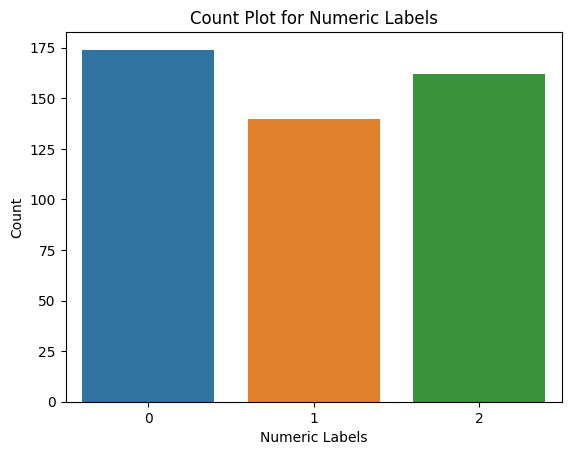

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

list_label=np.unique(y) #mendapatkan label unik
label_dict = {label: idx for idx, label in enumerate(list_label)} #masukkan dalam list
print(label_dict)
label_numerik = [label_dict[s] for s in y] #ubah kedalam numerik
label_numerik_array = np.array(label_numerik)

# Visualisasikan jumlah dalam plot
sns.countplot(x=label_numerik_array)
plt.xlabel('Numeric Labels')
plt.ylabel('Count')
plt.title('Count Plot for Numeric Labels')
plt.show()

# simpan dalam file npy untuk labeling
np.save('weight/label_knn.npy', label_dict)

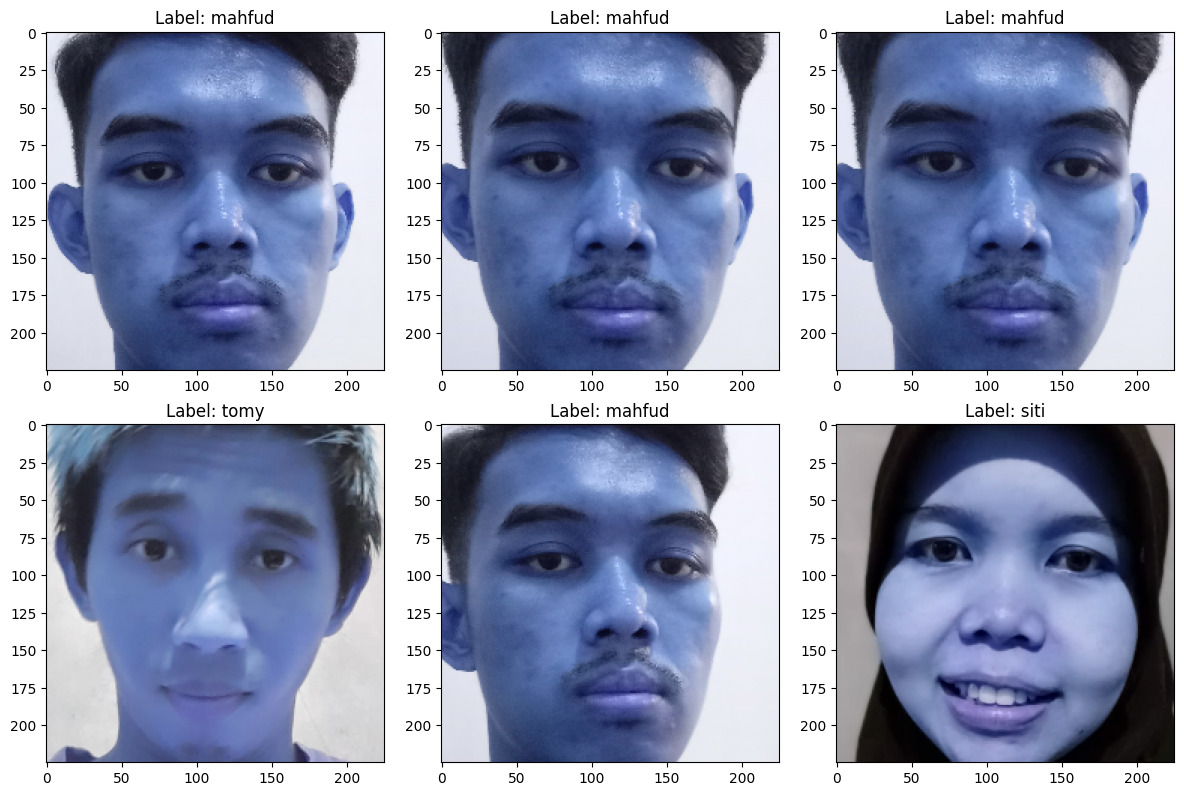

In [6]:
# Randomly select 6 indices from the data
random_indices = np.random.choice(len(X), 6, replace=False)

# Plot the images
plt.figure(figsize=(12, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 3, i+1)
    plt.imshow(X[idx])
    plt.title("Label: " + str(y[idx]))
plt.tight_layout()
plt.show()

In [7]:
print(f"awal {X.shape}")

jml_data = X.shape[0]
h = X.shape[1]
w = X.shape[2]
d = X.shape[3]
flatten  = h*w*d
#untuk shape ML itu 1 dimensi jadi X 3 dimensi harus di reshape jadi 1dimensi
X_1d = X.reshape(jml_data, flatten)

print(f"akhir {X_1d.shape}")

awal (476, 225, 225, 3)
akhir (476, 151875)


In [8]:
from sklearn.model_selection import train_test_split #library untuk train test split

#melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X_1d, label_numerik_array,test_size=0.20, stratify=y)
#train size adalah persentase data test yang di-split dengan proporsi label yang sama

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))

X_train: (380, 151875)
X_test: (96, 151875)
y_train: (380,)
y_test: (96,)


In [9]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold #melakukan validasi dengan hasil skor akurasi dengan cross validation

parameters = {'n_neighbors':[1, 3, 5, 7],
             'metric': ['minkowski','euclidean','manhattan']} #masukan parameter yang akan dilakukan

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
# Create the StratifiedKFold cross-validation method
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


clf = GridSearchCV(model, parameters, verbose=3, cv=stratified_kfold, scoring='accuracy') #panggil gridsearch
clf.fit(X_train,y_train) #train data
model_best = clf.best_estimator_ #model terbaik
print(clf.best_estimator_) #model terbaik
print(clf.best_score_) #akurasi terbaik

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END ...metric=minkowski, n_neighbors=1;, score=1.000 total time=   1.2s
[CV 2/3] END ...metric=minkowski, n_neighbors=1;, score=1.000 total time=   1.0s
[CV 3/3] END ...metric=minkowski, n_neighbors=1;, score=1.000 total time=   0.9s
[CV 1/3] END ...metric=minkowski, n_neighbors=3;, score=1.000 total time=   0.9s
[CV 2/3] END ...metric=minkowski, n_neighbors=3;, score=1.000 total time=   0.8s
[CV 3/3] END ...metric=minkowski, n_neighbors=3;, score=1.000 total time=   0.8s
[CV 1/3] END ...metric=minkowski, n_neighbors=5;, score=1.000 total time=   0.9s
[CV 2/3] END ...metric=minkowski, n_neighbors=5;, score=1.000 total time=   0.9s
[CV 3/3] END ...metric=minkowski, n_neighbors=5;, score=1.000 total time=   0.9s
[CV 1/3] END ...metric=minkowski, n_neighbors=7;, score=1.000 total time=   0.9s
[CV 2/3] END ...metric=minkowski, n_neighbors=7;, score=1.000 total time=   0.9s
[CV 3/3] END ...metric=minkowski, n_neighbors=7;

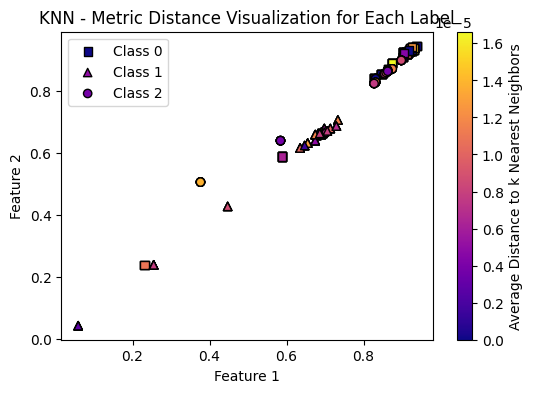

In [10]:
# Visualize the metric distances for each label separately with different marker shapes
plt.figure(figsize=(6, 4))
# Dictionary to map label to marker shape
marker_dict = {0: 's', 1: '^', 2: 'o'}
# Get the distances to the k nearest neighbors for each data point
distances, _ = model_best.kneighbors(X_train)
for label in np.unique(y_train):
    # Get the indices of data points belonging to the current label
    label_indices = np.where(y_train == label)[0]

    # Get the distances to the k nearest neighbors for data points of the current label
    label_distances = np.mean(distances[label_indices], axis=1)

    # Plot the distances for the current label with the corresponding marker shape
    plt.scatter(X_train[label_indices, 0], X_train[label_indices, 1], c=label_distances, cmap='plasma', edgecolors='k', label=f"Class {label}", marker=marker_dict[label])

plt.colorbar(label='Average Distance to k Nearest Neighbors')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN - Metric Distance Visualization for Each Label")
plt.legend()
plt.show()

In [11]:
y_pred = model_best.predict(X_test) #predict untuk memprediksi data test

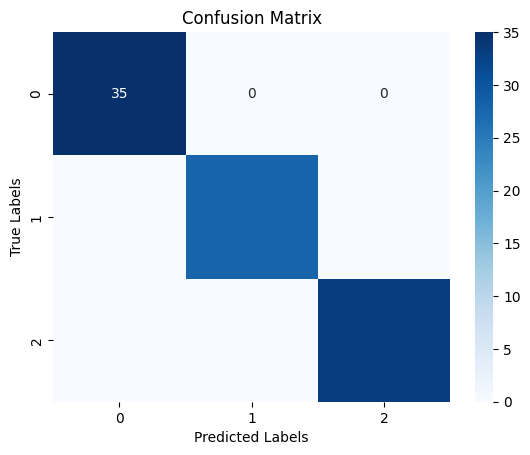

In [12]:
from sklearn.metrics import classification_report , confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [13]:
print(classification_report(y_test, y_pred)) #evaluasi hasil

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



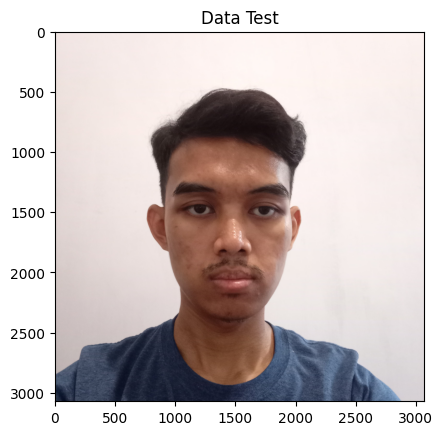

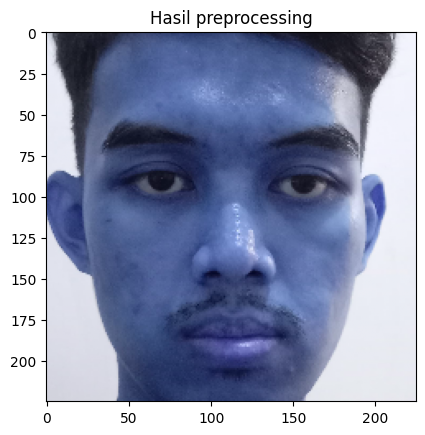

ukuran gambar test (151875,)
nilai probabilitas [[1. 0. 0.]]
mahfud = 100.0%
siti = 0.0%
tomy = 0.0%
prediksinya: ['mahfud']
The predicted image is : [0] -> ['mahfud']


In [14]:
import matplotlib.pyplot as plt
import cv2
import os
import os.path
import numpy as np

url= '../dataset_CV/mahfud/IMG-20231101-WA0011.jpg'
img=cv2.imread(url)
plt.figure()
plt.title("Data Test")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#pastikan langkah preprocessing yang dilakukan sama dengan data train
status,haarnya=haar(img)
convert = haarnya/255.0
img_resize = cv2.resize(convert,(225,225))
#tampilkan hasil
plt.figure()
plt.title("Hasil preprocessing")
plt.imshow(img_resize)
plt.show()



test=[img_resize.flatten()] #makukan ke list
print(f"ukuran gambar test {img_resize.flatten().shape}") #sama dengan input shape

# Mengecek hasil klasifikasi pada salah satu dataset
probability=model_best.predict_proba(test)
print(f"nilai probabilitas {probability}") #tampilkan nilai probabilitas tiap kelas



for ind,val in enumerate(label_dict): #mendapatkan nama kelas dan hasil akurasi
    print(f'{val} = {probability[0][ind]*100}%')


hasil = np.argmax(probability, axis=-1) #mendapatkan kelas dari probabilitas terbaik
key_found = [key for key, value in label_dict.items() if value == hasil] #dapatkan namanya
print(f"prediksinya: {key_found}")
print(f"The predicted image is : {str(hasil)} -> {key_found}")

In [15]:
import pickle
pickle.dump(model_best, open('weight/model_haar_knn_optimasi.pkl', 'wb')) #simpan dalam file.pkl

In [16]:
import cv2
import os
import os.path
import numpy as np
from time import sleep
import pickle

def read_model(filename, path=""):
    with open(os.path.join(path, filename), 'rb') as in_name:
        model = pickle.load(in_name)
        return model


color = (255, 0, 0)
cap = cv2.VideoCapture(0)
model = read_model("weight\model_haar_knn_optimasi.pkl", path="") #load model
label_dict = np.load('weight\label_knn.npy', allow_pickle=True).item() #load label


while (cap.isOpened()):
    ret , frame = cap.read() #baca vidio dengan looping gambar
    if ret:
        face_roi = []# Load Haar Cascade classifier for face detection
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        # Convert the image to grayscale (required for face detection)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image using the face_cascade
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
        # Draw bounding boxes around the detected faces and display the image
        for (x, y, w, h) in faces:
            # Draw a rectangle around the detected face
            face_roi = frame[y:y+h, x:x+w]
            cv2.rectangle(frame, (x-5, y-5), (x + w+5, y + h+5), (0, 255, 0), 4)#beri rectangle dan beri overlap sebesar 5

            convert = face_roi/255.0 #preprocessing
            muka = cv2.resize(convert, (225,225), interpolation = cv2.INTER_AREA)#wajib sama dengan citra inputan trainer
            cv2.imshow("Detect",muka)
            gambar_flat=[muka.flatten()] #jadikan 1 dimensi
            prediksi= model.predict(gambar_flat) #prediksi
            key_found = [key for key, value in label_dict.items() if value == prediksi] #dapatkan namanya
            cv2.putText(frame, f"Deteksi : {key_found[0]}", (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),2)
            cv2.imshow("Detect",muka)
        cv2.imshow("Video Original" , frame)
    else:
        print('no video')
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        continue

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

# Haar Cascade
Fungsi haar yang berisi perintah untuk melakukan deteksi wajah dari input berupa citra.

In [17]:
import cv2
import matplotlib.pyplot as plt
import os
def haar(img):
    face_roi = []
    status = False

    # Load Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the image to grayscale (required for face detection)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image using the face_cascade
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)

    # Draw bounding boxes around the detected faces and display the image
    for (x, y, w, h) in faces:
        # Draw a rectangle around the detected face
        face_roi = img[y:y+h, x:x+w]
        status = True
    return status,face_roi

# Scale Invariant Feature Transform
Deteksi Fitur menggunakan algoritma SIFT.

 jumlah keypoint terbentuk 500


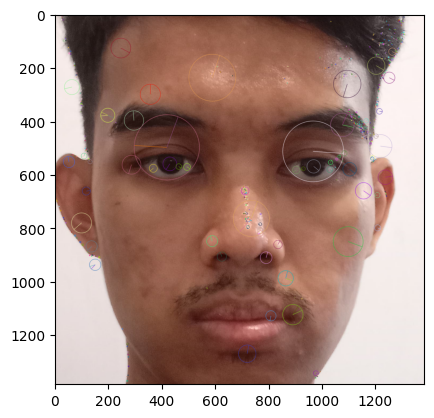

In [18]:
import cv2
import matplotlib.pyplot as plt

# Loading the image
img = cv2.imread('../dataset_CV/mahfud/IMG-20231101-WA0011.jpg')
status,haarnya=haar(img)

# Applying SIFT detector
sift = cv2.SIFT_create(500)
kpts, des = sift.detectAndCompute(haarnya, None)

# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(haarnya, kpts , haarnya ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
print(f" jumlah keypoint terbentuk {len(kpts)}")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Bag of Visual Word

In [19]:
import numpy as np
#kmeans works only on float, so convert integers to float
descriptors_float = des.astype(float)

# Perform k-means clustering and vector quantization

from scipy.cluster.vq import kmeans, vq
k = 100 #dari total 500 diambil hanya 100
voc, variance = kmeans(obs=descriptors_float, k_or_guess=k, iter=5)


# Calculate the histogram of features and represent them as vector
#vq Assigns codes from a code book to observations.
im_features = np.zeros((1, k), "float32")
for i in range(1):
    words, distance = vq(des,voc)
    for w in words:
        im_features[i][w] += 1
print(im_features.shape)
print(im_features)

(1, 100)
[[ 6.  1.  3.  5. 11.  5.  6.  5.  4.  7.  2.  3.  3.  1.  2.  2.  2.  1.
  12.  4.  4. 11.  2.  3.  3.  4.  3.  2.  8. 13.  4.  2.  8.  1.  5.  5.
   8.  3.  5.  2.  5.  5.  4.  7.  3.  1.  4.  1.  5.  4.  4.  2.  3.  7.
   2.  7.  1. 10. 10.  4.  6.  4.  3.  1.  2.  3.  1. 14.  7.  2.  4.  5.
   1.  4. 13.  7. 11.  2.  3.  3.  1.  6.  4.  1. 13.  3.  2.  3.  9.  9.
   2.  5. 16.  6.  3.  6. 32.  4.  6.  3.]]


# Feature Extarction
SIFT

In [23]:
#menentukan direktori/folder data citra yang akan dibuka
dirname = '../dataset_CV/'

#menentukan ukuran tinggi dan lebar gambar
height = 225
width = 225
dim = (width, height)

#BRISK is a good replacement to SIFT. ORB also works but didn;t work well for this example
sift = cv2.SIFT_create()
#mengumpulkan data citra yang akan dibuka dalam satu array
tampungan_data = []
tampungan_label = []
for path, subdirs, files in os.walk(dirname):
    print(path)
    for name in files:
        img_path = (os.path.join(path, name))  #baca path data
        if (img_path.endswith("jpg")): #dengan file berekstensi jpg
            img = cv2.imread(img_path) #baca gambar
            status, haarnya = haar(img)
            if(status):
                resized=cv2.resize(haarnya,dim, interpolation=cv2.INTER_LINEAR) #resize
                kpts, des = sift.detectAndCompute(resized, None)
                tampungan_data.append(des)

                path_parts = path.split('/')
                # Mengambil elemen terakhir dari path_parts sebagai kata terakhir
                last_word = path_parts[-1]
                #preprocessing data / segentasi  boleh dilakukan disini
                tampungan_label.append(last_word)
    X = np.array(tampungan_data, dtype=object)
    y = np.array(tampungan_label)

../dataset_CV/
../dataset_CV/mahfud
../dataset_CV/siti
../dataset_CV/tomy


Bag of Visual Word

In [24]:
descriptors = None
for descriptor in X:
    if descriptors is None:
        descriptors = descriptor
    else:
        descriptors = np.vstack((descriptors, descriptor)) #gunakan untuk menggabungkan deskriptor menjadi satu tumpukan

#kmeans works only on float, so convert integers to float
descriptors_float = descriptors.astype(float)
# Perform k-means clustering and vector quantization
from scipy.cluster.vq import kmeans, vq

k = 100 #k means with 100 clusters gives lower accuracy for the aeroplane example
voc, variance = kmeans(obs=descriptors_float, k_or_guess=k, iter=5)

# Calculate the histogram of features and represent them as vector
# vq Assigns codes from a code book to observations.
im_features = np.zeros((len(y), k), "float32")
for i in range(len(y)):
    words, distance = vq(X[i],voc)
    for w in words:
        im_features[i][w] += 1
print(im_features.shape)

(476, 100)


Hasil Kode

(476, 100)



Dalam tahap Bag of Visual Words, fitur-fitur visual yang terdeteksi dengan algoritma SIFT dikelompokkan menjadi kelompok-kelompok atau “kata-kata” visual menggunakan algoritma K-Means. Jumlah kelompok yang dihasilkan adalah 100, yang merupakan jumlah fitur akhir yang digunakan untuk mewakili citra secara kompak.

{'mahfud': 0, 'siti': 1, 'tomy': 2} jumlah data: 476


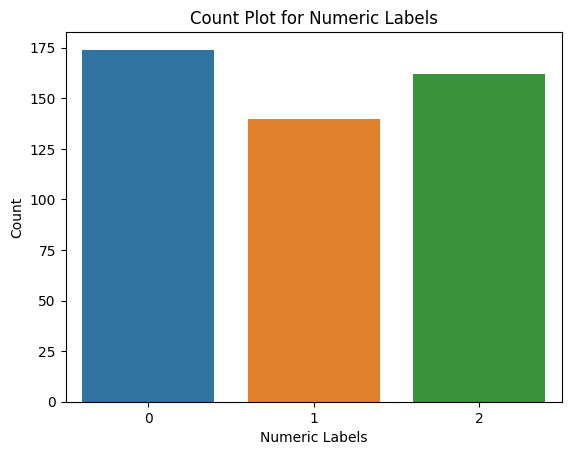

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

list_label=np.unique(y) #mendapatkan label unik
label_dict = {label: idx for idx, label in enumerate(list_label)} #masukkan dalam list
print(f"{label_dict} jumlah data: {len(y)}")

label_numerik = [label_dict[s] for s in y] #ubah kedalam numerik
label_numerik_array = np.array(label_numerik)

# Visualisasikan dalam jumlah dalam plot
sns.countplot(x=label_numerik_array)
plt.xlabel('Numeric Labels')
plt.ylabel('Count')
plt.title('Count Plot for Numeric Labels')
plt.show()

# simpan dalam file npy untuk labeling
np.save('weight/label_knn1.npy', label_dict)

# Train Test Split Data

In [26]:
from sklearn.model_selection import train_test_split #library untuk train test split

#melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(im_features, label_numerik_array,test_size=0.20, stratify=label_numerik_array)
#train size adalah persentase data test yang di-split dengan proporsi label yang sama

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))

X_train: (380, 100)
X_test: (96, 100)
y_train: (380,)
y_test: (96,)


# Klasifikasi KNN
K-Fold untuk model Terbaik

In [27]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold #melakukan validasi dengan hasil skor akurasi dengan cross validation
parameters = {'n_neighbors':[1, 3, 5, 7],
             'metric': ['minkowski','euclidean','manhattan']} #masukan parameter yang akan dilakukan

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

# Create the StratifiedKFold cross-validation method
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


clf = GridSearchCV(model, parameters, verbose=3, cv=stratified_kfold, scoring='accuracy') #panggil gridsearch
clf.fit(X_train,y_train) #train data
best = clf.best_estimator_ #model terbaik
print(clf.best_estimator_) #model terbaik
print(clf.best_score_) #akurasi terbaik

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END ...metric=minkowski, n_neighbors=1;, score=1.000 total time=   0.0s
[CV 2/3] END ...metric=minkowski, n_neighbors=1;, score=1.000 total time=   0.0s
[CV 3/3] END ...metric=minkowski, n_neighbors=1;, score=1.000 total time=   0.0s
[CV 1/3] END ...metric=minkowski, n_neighbors=3;, score=1.000 total time=   0.0s
[CV 2/3] END ...metric=minkowski, n_neighbors=3;, score=1.000 total time=   0.0s
[CV 3/3] END ...metric=minkowski, n_neighbors=3;, score=1.000 total time=   0.0s
[CV 1/3] END ...metric=minkowski, n_neighbors=5;, score=1.000 total time=   0.0s
[CV 2/3] END ...metric=minkowski, n_neighbors=5;, score=1.000 total time=   0.0s
[CV 3/3] END ...metric=minkowski, n_neighbors=5;, score=1.000 total time=   0.0s
[CV 1/3] END ...metric=minkowski, n_neighbors=7;, score=1.000 total time=   0.0s
[CV 2/3] END ...metric=minkowski, n_neighbors=7;, score=1.000 total time=   0.0s
[CV 3/3] END ...metric=minkowski, n_neighbors=7;

Visualisasi Matrix Distance

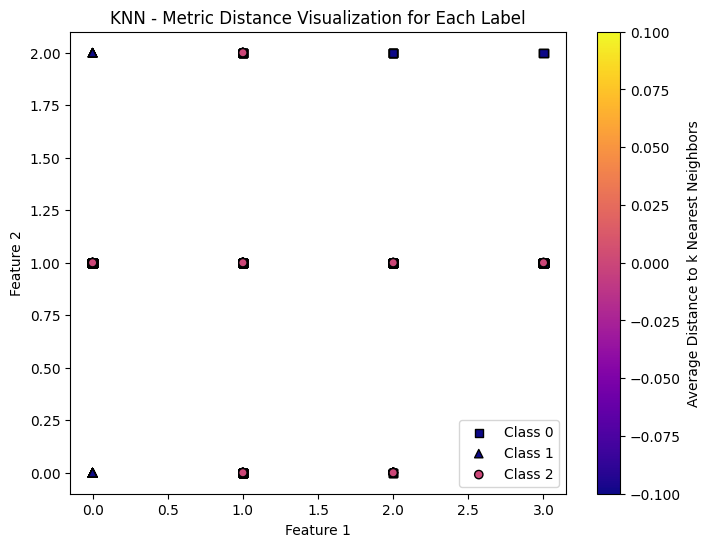

In [28]:
import matplotlib.pyplot as plt

# Visualize the metric distances for each label separately with different marker shapes
plt.figure(figsize=(8, 6))
distances, _ = best.kneighbors(X_train)

# Dictionary to map label to marker shape
marker_dict = {0: 's', 1: '^', 2: 'o'}

for label in np.unique(y_train):
    # Get the indices of data points belonging to the current label
    label_indices = np.where(y_train == label)[0]

    # Get the distances to the k nearest neighbors for data points of the current label
    label_distances = np.mean(distances[label_indices], axis=1)

    # Plot the distances for the current label with the corresponding marker shape
    plt.scatter(X_train[label_indices, 0], X_train[label_indices, 1], c=label_distances, cmap='plasma', edgecolors='k', label=f"Class {label}", marker=marker_dict[label])

plt.colorbar(label='Average Distance to k Nearest Neighbors')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN - Metric Distance Visualization for Each Label")
plt.legend()
plt.show()

# Testing

In [29]:
y_pred = best.predict(X_test) #predict untuk memprediksi data test

# Evaluasi

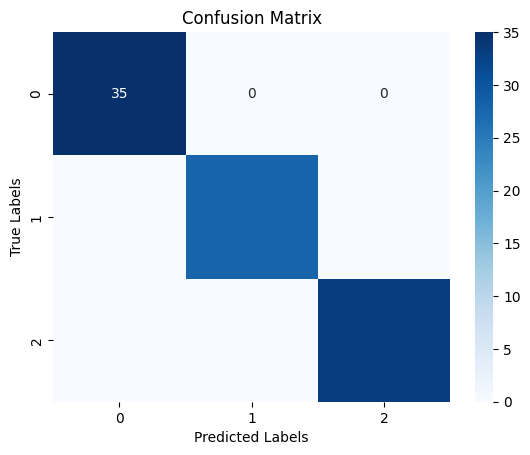

In [30]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [31]:
print(classification_report(y_test, y_pred)) #evaluasi hasil

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



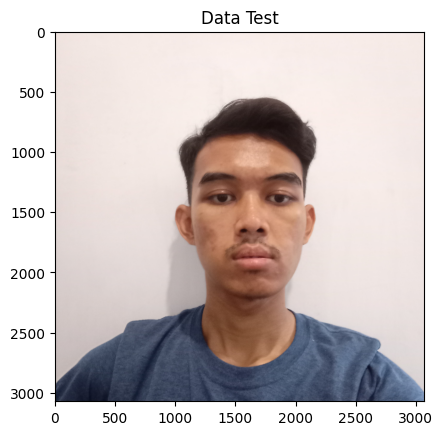

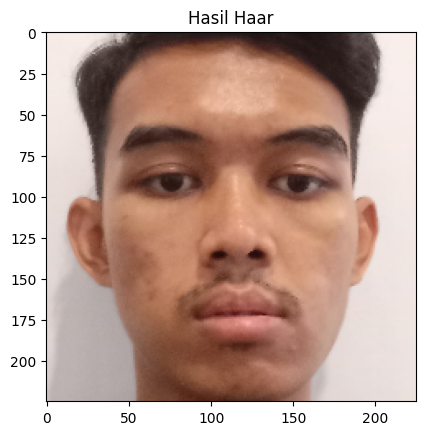

 jumlah keypoint terbentuk 161


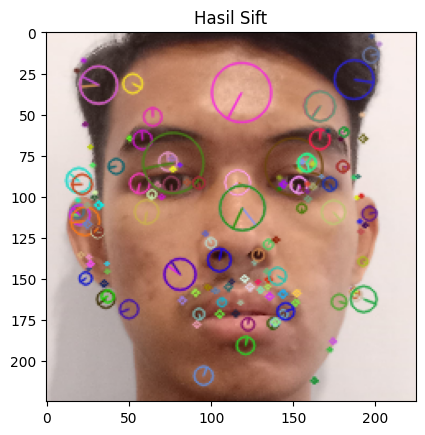

(1, 100)
ukuran data test (1, 100)
nilai probabilitas [[1. 0. 0.]]
mahfud = 100.0%
siti = 0.0%
tomy = 0.0%
prediksinya: ['mahfud']
The predicted image is : [0] -> ['mahfud']


In [32]:
import matplotlib.pyplot as plt
import cv2
import os
import os.path
import numpy as np

url= '../dataset_CV/mahfud/IMG-20231101-WA0027.jpg'
img=cv2.imread(url)
plt.figure()
plt.title("Data Test")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#pastikan langkah preprocessing yang dilakukan sama dengan data train
status,haarnya=haar(img)
img_resize = cv2.resize(haarnya,(225,225))
#tampilkan hasil
plt.figure()
plt.title("Hasil Haar")
plt.imshow(cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB))
plt.show()


plt.figure()
plt.title("Hasil Sift")
# sift = cv2.SIFT_create()
sift = cv2.SIFT_create(nfeatures=500, nOctaveLayers=9, contrastThreshold=0.03, edgeThreshold=10, sigma=1.6)
kpts, des = sift.detectAndCompute(img_resize, None)
# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(img_resize, kpts , img_resize ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
print(f" jumlah keypoint terbentuk {len(kpts)}")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


# bovw
#kmeans works only on float, so convert integers to float
descriptors_float = des.astype(float)
# Perform k-means clustering and vector quantization
from scipy.cluster.vq import kmeans, vq
k = 100 #dari total 500 diambil hanya 100
voc, variance = kmeans(obs=descriptors_float, k_or_guess=k, iter=5)
# Calculate the histogram of features and represent them as vector
#vq Assigns codes from a code book to observations.
im_features = np.zeros((1, k), "float32")
for i in range(1):
    words, distance = vq(des,voc)
    for w in words:
        im_features[i][w] += 1
print(im_features.shape)

print(f"ukuran data test {im_features.shape}") #sama dengan input shape

# Mengecek hasil klasifikasi pada salah satu dataset
probability=best.predict_proba(im_features)
print(f"nilai probabilitas {probability}") #tampilkan nilai probabilitas tiap kelas



for ind,val in enumerate(label_dict): #mendapatkan nama kelas dan hasil akurasi
    print(f'{val} = {probability[0][ind]*100}%')


hasil = np.argmax(probability, axis=-1) #mendapatkan kelas dari probabilitas terbaik
key_found = [key for key, value in label_dict.items() if value == hasil] #dapatkan namanya
print(f"prediksinya: {key_found}")
print(f"The predicted image is : {str(hasil)} -> {key_found}")

# Simpan Model

In [33]:
import pickle
pickle.dump(best, open('weight/model_haar_sift_knn_optimasi.pkl', 'wb')) #simpan dalam file.pkl

# Testing Video
Menggunakan Kamera Secara Langsung

In [35]:
import cv2
import os
import os.path
import numpy as np
from time import sleep
import pickle

def read_model(filename, path=""):
    with open(os.path.join(path, filename), 'rb') as in_name:
        model = pickle.load(in_name)
        return model


color = (255, 0, 0)
cap = cv2.VideoCapture(0) # 0 jika kamera
model = read_model("weight/model_haar_sift_knn_optimasi.pkl", path="") #load model
label_dict = np.load('weight/label_knn1.npy', allow_pickle=True).item() #load label


while (cap.isOpened()):
    ret , frame = cap.read() #baca vidio dengan looping gambar
    if ret:
        face_roi = [] # Load Haar Cascade classifier for face detection
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        # Convert the image to grayscale (required for face detection)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image using the face_cascade
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
        # Draw bounding boxes around the detected faces and display the image
        for (x, y, w, h) in faces:
            # Draw a rectangle around the detected face
            face_roi = frame[y:y+h, x:x+w]
            cv2.rectangle(frame, (x-5, y-5), (x + w+5, y + h+5), (0, 255, 0), 4)#beri rectangle dan beri overlap sebesar 5
            muka = cv2.resize(face_roi, (225,225), interpolation = cv2.INTER_AREA)#wajib sama dengan citra inputan trainer
            #sift
            sift = cv2.SIFT_create(nfeatures=500, nOctaveLayers=9, contrastThreshold=0.03, edgeThreshold=10, sigma=1.6)
            kpts, des = sift.detectAndCompute(muka, None)
            print(f" jumlah keypoint terbentuk {len(kpts)}")
            if(len(kpts) >= 100): #karna sistem akan akan menggunakan shape 200 minimal
                cv2.imshow("Haar",muka)
                # Marking the keypoint on the image using circles
                img=cv2.drawKeypoints(muka, kpts , muka ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
                # bovw
                #kmeans works only on float, so convert integers to float
                descriptors_float = des.astype(float)
                # Perform k-means clustering and vector quantization
                from scipy.cluster.vq import kmeans, vq
                k = 100 #dari total 500 diambil hanya 200
                voc, variance = kmeans(obs=descriptors_float, k_or_guess=k, iter=5)
                # Calculate the histogram of features and represent them as vector
                #vq Assigns codes from a code book to observations.
                im_features = np.zeros((1, k), "float32")
                for i in range(1):
                    words, distance = vq(des,voc)
                    for w in words:
                        im_features[i][w] += 1

                cv2.imshow("Sift",img)
                prediksi= model.predict(im_features) #prediksi
                key_found = [key for key, value in label_dict.items() if value == prediksi] #dapatkan namanya
                cv2.putText(frame, f"Deteksi : {key_found[0]}", (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),2)
        cv2.imshow("Video Original" , frame)
    else:
        print('no video')
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        continue

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

 jumlah keypoint terbentuk 90
 jumlah keypoint terbentuk 97
 jumlah keypoint terbentuk 104
 jumlah keypoint terbentuk 78
 jumlah keypoint terbentuk 81
 jumlah keypoint terbentuk 61
 jumlah keypoint terbentuk 85
 jumlah keypoint terbentuk 92
 jumlah keypoint terbentuk 87
 jumlah keypoint terbentuk 75
 jumlah keypoint terbentuk 68
 jumlah keypoint terbentuk 64
 jumlah keypoint terbentuk 69
 jumlah keypoint terbentuk 80
 jumlah keypoint terbentuk 86
 jumlah keypoint terbentuk 81
 jumlah keypoint terbentuk 85
 jumlah keypoint terbentuk 82
 jumlah keypoint terbentuk 73
 jumlah keypoint terbentuk 69
 jumlah keypoint terbentuk 98
 jumlah keypoint terbentuk 93
 jumlah keypoint terbentuk 75
 jumlah keypoint terbentuk 76
 jumlah keypoint terbentuk 91
 jumlah keypoint terbentuk 94
 jumlah keypoint terbentuk 96
 jumlah keypoint terbentuk 79
 jumlah keypoint terbentuk 59
 jumlah keypoint terbentuk 36
 jumlah keypoint terbentuk 58
 jumlah keypoint terbentuk 33
 jumlah keypoint terbentuk 102
 jumlah 

 jumlah keypoint terbentuk 65
 jumlah keypoint terbentuk 104
 jumlah keypoint terbentuk 91
 jumlah keypoint terbentuk 97
 jumlah keypoint terbentuk 147
 jumlah keypoint terbentuk 69
 jumlah keypoint terbentuk 100
 jumlah keypoint terbentuk 71
 jumlah keypoint terbentuk 93
 jumlah keypoint terbentuk 107
 jumlah keypoint terbentuk 114
 jumlah keypoint terbentuk 139
 jumlah keypoint terbentuk 139
 jumlah keypoint terbentuk 109
 jumlah keypoint terbentuk 119
 jumlah keypoint terbentuk 137
 jumlah keypoint terbentuk 141
 jumlah keypoint terbentuk 74
 jumlah keypoint terbentuk 134
 jumlah keypoint terbentuk 114
 jumlah keypoint terbentuk 123
 jumlah keypoint terbentuk 121
 jumlah keypoint terbentuk 128
 jumlah keypoint terbentuk 134
 jumlah keypoint terbentuk 133
 jumlah keypoint terbentuk 138
 jumlah keypoint terbentuk 144
 jumlah keypoint terbentuk 144
 jumlah keypoint terbentuk 101
 jumlah keypoint terbentuk 105
 jumlah keypoint terbentuk 105
 jumlah keypoint terbentuk 123
 jumlah keypoin

-1

Menggunakan Input Video

In [36]:
import cv2
import os
import os.path
import numpy as np
from time import sleep
import pickle

def read_model(filename, path=""):
    with open(os.path.join(path, filename), 'rb') as in_name:
        model = pickle.load(in_name)
        return model


color = (255, 0, 0)
video_path = input("Masukkan path video: ")  # Meminta pengguna untuk memasukkan path video
cap = cv2.VideoCapture(video_path)  # Membaca video dari file yang ditentukan

model = read_model("weight/model_haar_sift_knn_optimasi.pkl", path="") #load model
label_dict = np.load('weight/label_knn1.npy', allow_pickle=True).item() #load label


while (cap.isOpened()):
    ret , frame = cap.read() #baca video dengan looping gambar
    if ret:
        face_roi = []# Load Haar Cascade classifier for face detection
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        # Convert the image to grayscale (required for face detection)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image using the face_cascade
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
        # Draw bounding boxes around the detected faces and display the image
        for (x, y, w, h) in faces:
            # Draw a rectangle around the detected face
            face_roi = frame[y:y+h, x:x+w]
            cv2.rectangle(frame, (x-5, y-5), (x + w+5, y + h+5), (0, 255, 0), 4)#beri rectangle dan beri overlap sebesar 5
            muka = cv2.resize(face_roi, (225,225), interpolation = cv2.INTER_AREA)#wajib sama dengan citra inputan trainer
            #sift
            sift = cv2.SIFT_create(nfeatures=500, nOctaveLayers=9, contrastThreshold=0.03, edgeThreshold=10, sigma=1.6)
            kpts, des = sift.detectAndCompute(muka, None)
            print(f" jumlah keypoint terbentuk {len(kpts)}")
            if(len(kpts) >= 100): #karna sistem akan akan menggunakan shape 100 minimal
                cv2.imshow("Haar",muka)
                # Marking the keypoint on the image using circles
                img=cv2.drawKeypoints(muka, kpts , muka ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
                # bovw
                #kmeans works only on float, so convert integers to float
                descriptors_float = des.astype(float)
                # Perform k-means clustering and vector quantization
                from scipy.cluster.vq import kmeans, vq
                k = 100 #dari total 500 diambil hanya 100
                voc, variance = kmeans(obs=descriptors_float, k_or_guess=k, iter=5)
                # Calculate the histogram of features and represent them as vector
                #vq Assigns codes from a code book to observations.
                im_features = np.zeros((1, k), "float32")
                for i in range(1):
                    words, distance = vq(des,voc)
                    for w in words:
                        im_features[i][w] += 1

                cv2.imshow("Sift",img)
                prediksi= model.predict(im_features) #prediksi
                key_found = [key for key, value in label_dict.items() if value == prediksi] #dapatkan namanya
                cv2.putText(frame, f"Deteksi : {key_found[0]}", (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),2)
        cv2.imshow("Video Original" , frame)
    else:
        print('no video')
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        continue

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

#../dataset_CV/Videotest.mp4

Masukkan path video: ../dataset_CV/Videotest.mp4
 jumlah keypoint terbentuk 156
 jumlah keypoint terbentuk 133
 jumlah keypoint terbentuk 131
 jumlah keypoint terbentuk 130
 jumlah keypoint terbentuk 145
 jumlah keypoint terbentuk 144
 jumlah keypoint terbentuk 153
 jumlah keypoint terbentuk 148
 jumlah keypoint terbentuk 142
 jumlah keypoint terbentuk 131
 jumlah keypoint terbentuk 137
 jumlah keypoint terbentuk 126
 jumlah keypoint terbentuk 137
 jumlah keypoint terbentuk 139
 jumlah keypoint terbentuk 135
 jumlah keypoint terbentuk 152
 jumlah keypoint terbentuk 133
 jumlah keypoint terbentuk 147
 jumlah keypoint terbentuk 115
 jumlah keypoint terbentuk 116
 jumlah keypoint terbentuk 131
 jumlah keypoint terbentuk 137
 jumlah keypoint terbentuk 129
 jumlah keypoint terbentuk 129
 jumlah keypoint terbentuk 105
 jumlah keypoint terbentuk 125
 jumlah keypoint terbentuk 119
 jumlah keypoint terbentuk 132
 jumlah keypoint terbentuk 125
 jumlah keypoint terbentuk 129
 jumlah keypoint terb

 jumlah keypoint terbentuk 105
 jumlah keypoint terbentuk 125
 jumlah keypoint terbentuk 108
 jumlah keypoint terbentuk 120
 jumlah keypoint terbentuk 115
 jumlah keypoint terbentuk 96
 jumlah keypoint terbentuk 96
 jumlah keypoint terbentuk 91
 jumlah keypoint terbentuk 96
 jumlah keypoint terbentuk 87
 jumlah keypoint terbentuk 100
 jumlah keypoint terbentuk 83
 jumlah keypoint terbentuk 84
 jumlah keypoint terbentuk 87
 jumlah keypoint terbentuk 92
 jumlah keypoint terbentuk 101
 jumlah keypoint terbentuk 100
 jumlah keypoint terbentuk 90
 jumlah keypoint terbentuk 88
 jumlah keypoint terbentuk 94
 jumlah keypoint terbentuk 102
 jumlah keypoint terbentuk 110
 jumlah keypoint terbentuk 105
 jumlah keypoint terbentuk 116
 jumlah keypoint terbentuk 111
 jumlah keypoint terbentuk 104
 jumlah keypoint terbentuk 121
 jumlah keypoint terbentuk 115
 jumlah keypoint terbentuk 131
 jumlah keypoint terbentuk 133
 jumlah keypoint terbentuk 117
 jumlah keypoint terbentuk 125
 jumlah keypoint ter

-1